### 4. Data concatenation:

A script has been written to sort aligned files for concatenation:

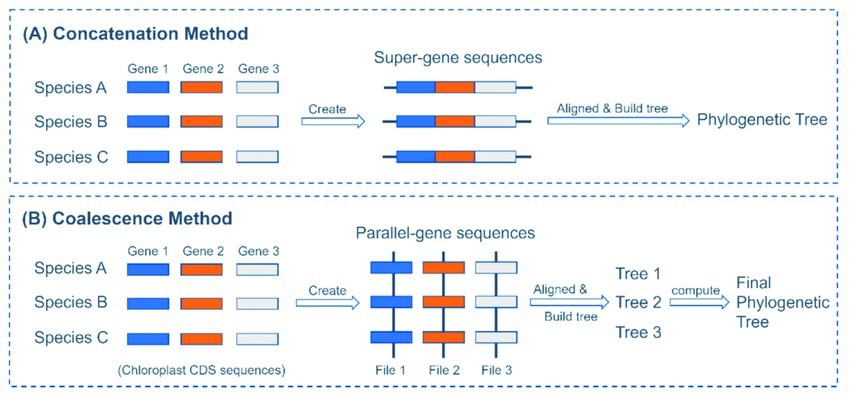

In [5]:
Image(filename='ph1_1.jpg')

In [ ]:
def read_fasta_file(file_path):
    headers = []
    sequences = []
    with open(file_path, 'r') as file:
        header = ''
        sequence = ''
        for line in file:
            line = line.strip()
            if line.startswith('>'):
                if header != '':
                    headers.append(header)
                    sequences.append(sequence)
                header = line[1:]
                sequence = ''
            else:
                sequence += line
        headers.append(header)
        sequences.append(sequence)
    return headers, sequences

def write_fasta_file(file_path, headers, sequences):
    with open(file_path, 'w') as file:
        for i in range(len(headers)):
            file.write('>' + headers[i] + '\n')
            file.write(sequences[i] + '\n')

def sort_fasta_files(sequence_file, *fasta_files):
   # Reading a FASTA file with identifiers and sequences
    sequence_headers, sequence_sequences = read_fasta_file(sequence_file)

    # Creating a dictionary to store identifiers and corresponding sequences
    sequence_dict = {header: sequence for header, sequence in zip(sequence_headers, sequence_sequences)}

    # Sorting the rest of the FASTA files
    for fasta_file in fasta_files:
        headers, sequences = read_fasta_file(fasta_file)

        # Creating a list of tuples (ID, sequence)
        seq_tuples = [(header, sequence) for header, sequence in zip(headers, sequences)]

        # Sorting the list of tuples based on the order of identifiers in the file sequence_ids.fasta
        sorted_seq_tuples = sorted(seq_tuples, key=lambda x: sequence_headers.index(x[0]))

        # Separating sorted identifiers and sequences
        sorted_headers, sorted_sequences = zip(*sorted_seq_tuples)

        # Writing the sorted data to a new file
        write_fasta_file(fasta_file + '.sorted', sorted_headers, sorted_sequences)

sort_fasta_files('sequences_Moskalenko_h3_gr1_muscle.fa', 'sequences_Moskalenko_s_16_gr1_muscle.fa', 'sequences_Moskalenko_s_18_gr1_muscle.fa', 'sequences_Moskalenko_s_28_gr1_muscle.fa', 'sequences_Moskalenko_coi_gr1_muscle.fa')
sort_fasta_files('sequences_Moskalenko_eF1a_gr2_muscle.fa', 'sequences_Moskalenko_s_16_gr2_muscle.fa', 'sequences_Moskalenko_s_18_gr2_muscle.fa', 'sequences_Moskalenko_s_28_gr2_muscle.fa', 'sequences_Moskalenko_coi_gr2_muscle.fa')
sort_fasta_files('sequences_Moskalenko_eF1a_muscle.fa', 'sequences_Moskalenko_s_16_muscle.fa', 'sequences_Moskalenko_s_18_muscle.fa', 'sequences_Moskalenko_s_28_muscle.fa', 'sequences_Moskalenko_coi_muscle.fa', 'sequences_Moskalenko_h3_muscle.fa')

Also, in addition to data concatenation, we will output a data splitting scheme (how many partitions and which ones):
NB: Be careful, concatenation is wrong for , it's better to just remember the partitioning scheme, the correct file for concatenation is made using MEGA11.

In [43]:
! catfasta2phyml sequences_Moskalenko_h3_gr1_muscle.fa sequences_Moskalenko_s_16_gr1_muscle_sorted.fa sequences_Moskalenko_s_18_gr1_muscle_sorted.fa sequences_Moskalenko_s_28_gr1_muscle_sorted.fa sequences_Moskalenko_coi_gr1_muscle_sorted.fa > sequences_Moskalenko_gr1_muscle.fasta 2> partitions_gr1.txt

In [1]:
! cat partitions_gr1.txt

sequences_Moskalenko_h3_gr1_muscle.fa = 1-481
sequences_Moskalenko_s_16_gr1_muscle_sorted.fa = 482-16475
sequences_Moskalenko_s_18_gr1_muscle_sorted.fa = 16476-18703
sequences_Moskalenko_s_28_gr1_muscle_sorted.fa = 18704-20166
sequences_Moskalenko_coi_gr1_muscle_sorted.fa = 20167-21735


In [ ]:
! catfasta2phyml sequences_Moskalenko_eF1a_gr2_muscle.fa sequences_Moskalenko_s_16_gr2_muscle_sorted.fa sequences_Moskalenko_s_18_gr2_muscle_sorted.fa sequences_Moskalenko_s_28_gr2_muscle_sorted.fa sequences_Moskalenko_coi_gr2_muscle_sorted.fa > sequences_Moskalenko_gr2_muscle.fasta 2> partitions_gr2.txt

In [2]:
! cat partitions_gr2.txt

sequences_Moskalenko_eF1a_gr2_muscle.fa = 1-2876
sequences_Moskalenko_s_16_gr2_muscle_sorted.fa = 2877-18903
sequences_Moskalenko_s_18_gr2_muscle_sorted.fa = 18904-21242
sequences_Moskalenko_s_28_gr2_muscle_sorted.fa = 21243-22769
sequences_Moskalenko_coi_gr2_muscle_sorted.fa = 22770-24338


After the initial manual processing :

In [ ]:
! catfasta2phyml sequences_Moskalenko_eF1a_muscle.fa sequences_Moskalenko_s_16_muscle_sorted.fa sequences_Moskalenko_s_18_muscle_sorted.fa sequences_Moskalenko_s_28_muscle_sorted.fa sequences_Moskalenko_coi_muscle_sorted.fa sequences_Moskalenko_h3_muscle_sorted.fa > sequences_Moskalenko_all_muscle.fasta 2> partitions_all.txt

In [1]:
! cat partitions_all.txt

sequences_Moskalenko_eF1a_muscle.fa = 1-3320
sequences_Moskalenko_s_16_muscle_sorted.fa = 3321-19343
sequences_Moskalenko_s_18_muscle_sorted.fa = 19344-21720
sequences_Moskalenko_s_28_muscle_sorted.fa = 21721-23401
sequences_Moskalenko_coi_muscle_sorted.fa = 23402-24970
sequences_Moskalenko_h3_muscle_sorted.fa = 24971-25451


In [6]:
from Bio import SeqIO
from Bio.Seq import Seq

def clean_sequence(sequence):
    # Remove non-standard nucleotides and ambiguous characters
    cleaned_seq = sequence.replace("-", "").replace("N", "").replace("n", "")

    return cleaned_seq

def translate_sequences(input_file, output_file):
    with open(output_file, "w") as output_handle:
        for record in SeqIO.parse(input_file, "fasta"):
            # Clean the sequence
            cleaned_seq = clean_sequence(str(record.seq))

            # Check if the sequence length is a multiple of three
            if len(cleaned_seq) % 3 != 0:
                print(f"NB: {record.id}: Sequence length is not a multiple of three.")
                continue

            # Translate the cleaned sequence
            translated_seq = Seq(cleaned_seq).translate()

            # Write the translated sequence to the output file
            output_handle.write(f">{record.id}\n")
            output_handle.write(f"{translated_seq}\n")

In [ ]:
input_file = "sequences_Moskalenko_coi_gr2_muscle_sorted.fa"
output_file = "sequences_Moskalenko_coi_gr2_muscle_translated.fa"

translate_sequences(input_file, output_file)

In [ ]:
input_file = "sequences_Moskalenko_eF1a_gr2_muscle.fa"
output_file = "sequences_Moskalenko_eF1a_gr2_muscle_translated.fa"

translate_sequences(input_file, output_file)

This is strange, since the article says that protein coding sequences (COI and H3) entered as amino acid sequences